# Boston Crime Incident Analysis

## Introduction

In this dataset, Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond. This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred. Records in the new system begin in June of 2015.

This dataset contains records of crime incident reports using the new system starting in June of 2015.

CRIME INCIDENT REPORTS
This dataset is retrieved from data.boston.gov it has 18 columns and 381324 rows. Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond.

Finding the area with very high occurrence of crime and timeframe in which the crime occurs most frequently?

Dataset link - https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/12cb3883-56f5-47de-afa5-3b1cf61b257b/download/tmpvftuh_m1.csv


This dataset consists of the following columns:

* INCIDENT_NUMBER - It is a unique number assigned by the BPD to identify the crime incident record.
* OFFENSE_CODE - Every crime has its offence code which tells about the crime.
* OFFENSE_CODE_GROUP - Every crime has its offence code group which tells which crime group does it come under.
* OFFENSE_DESCRIPTION - It describes the Crime Incident.
* DISTRICT - District the crime incident occured.
* REPORTING_AREA - Area where the crime incident occured. 
* SHOOTING - If there was a shooting involved. 'Y' if yes or else NULL.
* OCCURRED_ON_DATE - Date and Time of the Crime incident.
* YEAR - Year in which the crime incident occured.
* MONTH - Month in which the crime incident occured.
* DAY_OF_WEEK - Day of the week in which the crime incident occured.
* HOUR - Hour in which the crime incident occured.
* UCR_PART - Uniform Crime Reporting (UCR) program comprises of the data on crime in the United States which comes under the Federal Bureau of Investigation (FBI). Crimes are assigned a UCR_PART like Part 1, 2, 3, etc. where part 1 being the most serious crimes.
* STREET - Street on which the crime incident occured
* Lat - Co-ordinates of the crime location. (Latitude)
* Long - Co-ordinates of the crime location. (Longitude)
* Location - Co-ordinates of the crime location. (Latitude & Longitude)

Some of the questions that we can answer to BPD and people of Boston:
* Which areas should BPD concentrate more on in order to avoid serious crimes?
* When should BPD recruit more officials?
* Which areas, streets and time during the day should people be more careful?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sb
import pylab
import warnings

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Importing/Calling the Python script.

In [2]:
from Naveen_Peddyreddy_Capstone_Project import eda # created a function which displays the missing and unique info about the columns.

## Data Extraction:

In [3]:
#importing the publicaly available dataset

df = pd.read_csv('https://data.boston.gov/dataset/6220d948-eae2-4e4b-8723-2dc8e67722a3/resource/12cb3883-56f5-47de-afa5-3b1cf61b257b/download/tmpvftuh_m1.csv', low_memory = False) # Reading the csv file and setting low memory as false as it is a large dataset.
pd.set_option('display.max_rows', 500) # Display max. 500 rows in the dataset.
#df
#This dataset contains records of crime incident reports using the new system starting in June of 2015.

In [4]:
print(df.shape) # Number of rows and columns in the dataset.
df.columns # All column names in the dataset.

(426820, 17)


Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

## Data Cleanup:

In [5]:
eda(df)

,Total number of values,Total Missing Values,Percentage missing,Count of unique values,Data type
INCIDENT_NUMBER,426820,0,0.000000,375591,object
OFFENSE_CODE,426820,0,0.000000,222,int64
OFFENSE_CODE_GROUP,426820,0,0.000000,67,object
OFFENSE_DESCRIPTION,426820,0,0.000000,244,object
DISTRICT,426820,2170,0.508411,12,object
REPORTING_AREA,426820,0,0.000000,880,object
SHOOTING,426820,425073,99.590694,1,object
OCCURRED_ON_DATE,426820,0,0.000000,309494,object
YEAR,426820,0,0.000000,5,int64
MONTH,426820,0,0.000000,12,int64


In [6]:
df.isnull().sum() # Finding the number of null values in all columns

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 2170
REPORTING_AREA              0
SHOOTING               425073
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                  110
STREET                  12390
Lat                     27203
Long                    27203
Location                    0
dtype: int64

In [7]:
df.rename(columns = {'Lat' : 'LATITUDE', 'Long' : 'LONGITUDE', 'Location' : 'LOCATION'}, inplace = True) # renaming the Lat and Long columns
df.columns # All column names in the dataset.

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [8]:
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE']) # As the OCCURED_ON_DATE column has date and time column values, converting the datatype.

# Convert DAY_OF_WEEK to an ordered category
df.DAY_OF_WEEK = pd.Categorical(df.DAY_OF_WEEK, categories = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], ordered = True)

df.SHOOTING.fillna('N', inplace = True) # Fill in nans in SHOOTING column

# Replace -1 values in Lat/Long with Nan
df.LATITUDE.replace(-1, None, inplace = True)
df.LONGITUDE.replace(-1, None, inplace = True)

In [9]:
eda(df)

,Total number of values,Total Missing Values,Percentage missing,Count of unique values,Data type
INCIDENT_NUMBER,426820,0,0.000000,375591,object
OFFENSE_CODE,426820,0,0.000000,222,int64
OFFENSE_CODE_GROUP,426820,0,0.000000,67,object
OFFENSE_DESCRIPTION,426820,0,0.000000,244,object
DISTRICT,426820,2170,0.508411,12,object
REPORTING_AREA,426820,0,0.000000,880,object
SHOOTING,426820,0,0.000000,2,object
OCCURRED_ON_DATE,426820,0,0.000000,309494,datetime64[ns]
YEAR,426820,0,0.000000,5,int64
MONTH,426820,0,0.000000,12,int64


## Data Visualization & Descriptive Analytics

In [10]:
offense = pd.pivot_table(df.loc[:, ['OFFENSE_CODE_GROUP', 'YEAR', 'OFFENSE_CODE']], index = 'OFFENSE_CODE_GROUP', \
              columns = 'YEAR', aggfunc = np.count_nonzero)

summary = pd.DataFrame(offense.apply(np.sum, axis = 1))
summary = summary.rename(columns = {0 : 'total'})

sumsort = summary.sort_values(by = 'total', ascending = False)
sumsort

,total
OFFENSE_CODE_GROUP,
Motor Vehicle Accident Response,49603.0
Larceny,34753.0
Medical Assistance,32739.0
Investigate Person,24771.0
Other,24049.0
Drug Violation,22050.0
Simple Assault,21347.0
Vandalism,20132.0
Verbal Disputes,17753.0


As the top 2 offence code groups are Motor Vehicle accident response and Larceny which are UCR Part 3 and UCR Part 1 respectively. As UCR Part 1 is a more serious crime, we have to concentrate more on the Larceny group.

In [11]:
# Keep only data on UCR Part One offenses
df1 = df.loc[df['UCR_PART'] == 'Part One']

# Remove unused columns
df1 = df1.drop(['OFFENSE_CODE','UCR_PART'], axis=1)

Filtering the largest offence group 'Larceny' by the streets on which the crime was committed.

BOYLSTON ST          2809
WASHINGTON ST        2584
NEWBURY ST           1177
HUNTINGTON AVE       1080
TREMONT ST            802
HARRISON AVE          727
BLUE HILL AVE         723
MASSACHUSETTS AVE     697
DORCHESTER AVE        619
COMMONWEALTH AVE      582
Name: STREET, dtype: int64


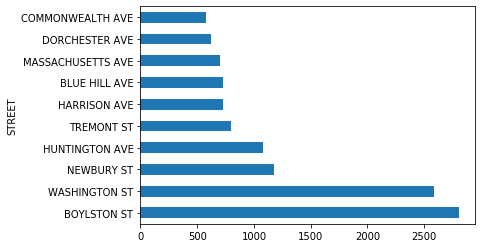

In [12]:
df_l = df1.loc[df1['OFFENSE_CODE_GROUP'] == 'Larceny']

print(df_l['STREET'].value_counts().head(10))
df_l.groupby('STREET').size().sort_values(ascending = False).head(10).plot(kind = 'barh')

## Insights

From the above analysis we can say that most larcency crimes occur on streets like Boylston St. Washington ST. and Newbury St. Hence, security should be increased in these areas.

Analyzing the UCR part 1 data and plotting the numbers of crimes committed by Year, Month, Day and Hour.

In [13]:
year_group = df1.groupby(by = 'YEAR')
yg_count = year_group.count()
y_num = pd.DataFrame(yg_count.iloc[:, 0])
y_num.rename(columns={'INCIDENT_NUMBER':'NUMBER'},inplace=True)
y_num

,NUMBER
YEAR,
2015,12339
2016,19306
2017,18418
2018,18005
2019,12701


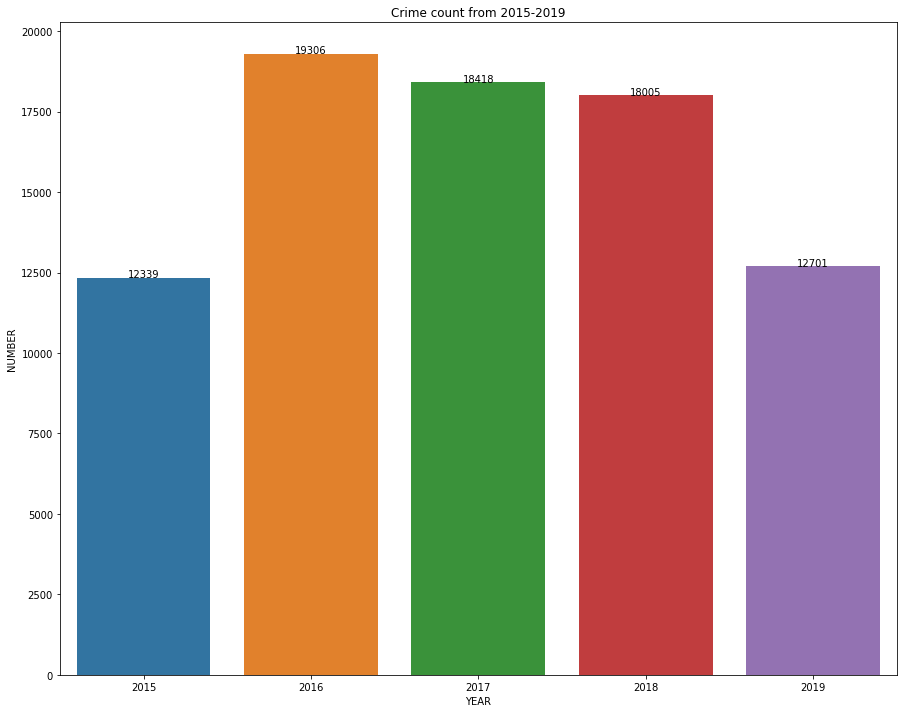

In [14]:
plt.figure(figsize = (15,12))
plt.title(r'Crime count from 2015-2019')
p1 = sb.barplot(x = y_num.index, y = 'NUMBER', data = y_num)
x = np.arange(y_num.index.shape[0])
y = np.array(list(y_num['NUMBER']))
for i, j in zip(x, y):
    plt.text(i, j, '%d'%j, ha='center')
else:
    pass
p1fig = p1.get_figure()
p1fig.savefig('./total_crimes_by_year_bar.png')
plt.show()

## Insights

From the above plot we can say that most serious crimes were reported in the year 2016 and it has relatively reduced since then.

In [15]:
month_group = df1.groupby(by = 'MONTH')
mg_count = month_group.count()
m_num = pd.DataFrame(mg_count.iloc[:, 0])
m_num.rename(columns={'INCIDENT_NUMBER':'NUMBER'},inplace=True)
m_num

,NUMBER
MONTH,
1,5846
2,4918
3,5218
4,5559
5,6199
6,7583
7,8907
8,8947
9,8343


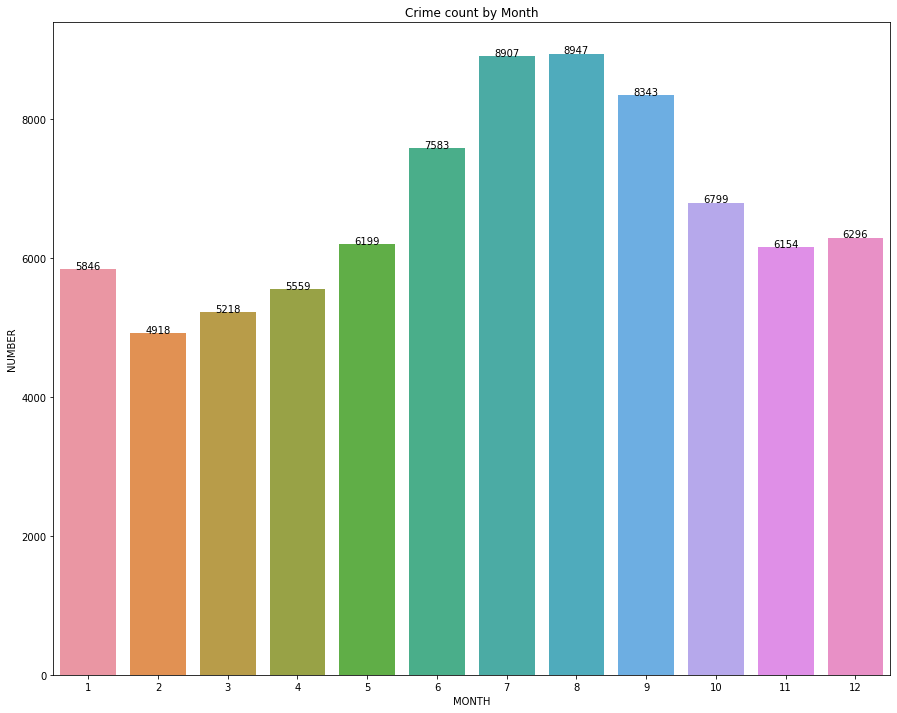

In [16]:
plt.figure(figsize = (15,12))
plt.title(r'Crime count by Month')
p2 = sb.barplot(x = m_num.index, y = 'NUMBER', data = m_num)
x = np.arange(m_num.index.shape[0])
y = np.array(list(m_num['NUMBER']))
for i, j in zip(x, y):
    plt.text(i, j, '%d'%j, ha='center')
else:
    pass
p2fig = p2.get_figure()
p2fig.savefig('./total_crimes_by_month_bar.png')
plt.show()

## Insights

From the above bar graph we can say that most crimes occur during July to September. Crimes are almost half during Feb to April.

In [17]:
day_group = df1.groupby(by = 'DAY_OF_WEEK')
dg_count = day_group.count()
d_num = pd.DataFrame(dg_count.iloc[:, 0])
d_num.rename(columns={'INCIDENT_NUMBER':'NUMBER'},inplace=True)
d_num

,NUMBER
DAY_OF_WEEK,
Monday,11388
Tuesday,11569
Wednesday,11594
Thursday,11530
Friday,12168
Saturday,11739
Sunday,10781


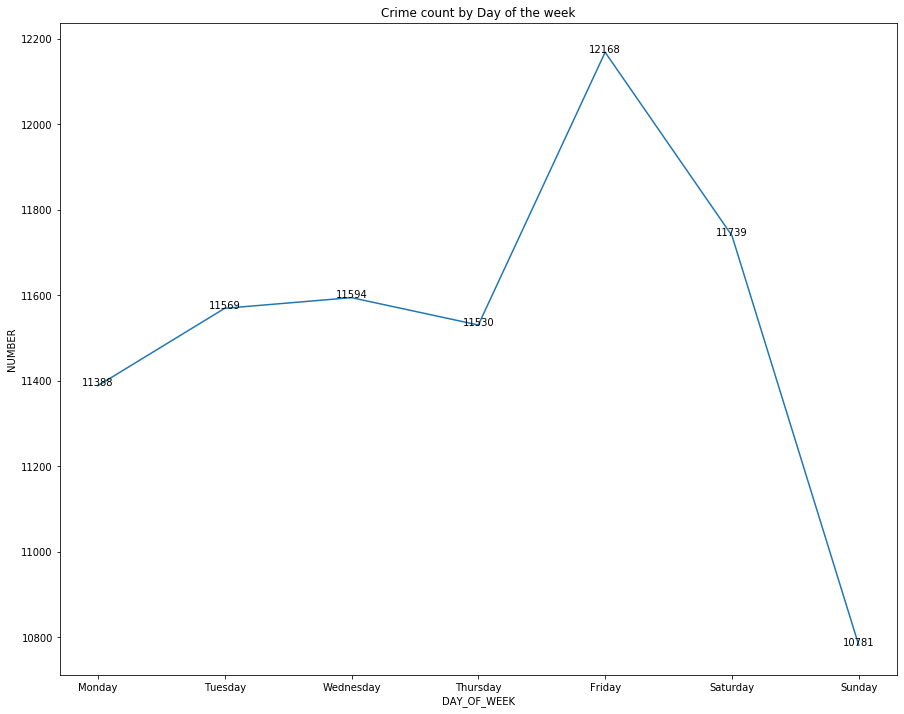

In [18]:
plt.figure(figsize = (15,12))
plt.title(r'Crime count by Day of the week')
p4 = sb.lineplot(x = d_num.index, y = 'NUMBER', data = d_num)
x = np.arange(d_num.index.shape[0])
y = np.array(list(d_num['NUMBER']))
for i, j in zip(x, y):
    plt.text(i, j, '%d'%j, ha='center')
else:
    pass
p4fig = p4.get_figure()
p4fig.savefig('./total_crimes_by_day_of_the_week_bar.png')
plt.show()

## Insights

From the above line chart we can say that most crimes are reported on Fridays and there is a steap drop in crimes from friday to Sunday, So BPD should increase the security on Thursday and Fridays

In [19]:
hour_group = df1.groupby(by = 'HOUR')
hg_count = hour_group.count()
h_num = pd.DataFrame(hg_count.iloc[:, 0])
h_num.rename(columns={'INCIDENT_NUMBER':'NUMBER'},inplace=True)
h_num

,NUMBER
HOUR,
0,3898
1,2233
2,1929
3,1257
4,974
5,909
6,1185
7,1969
8,2967


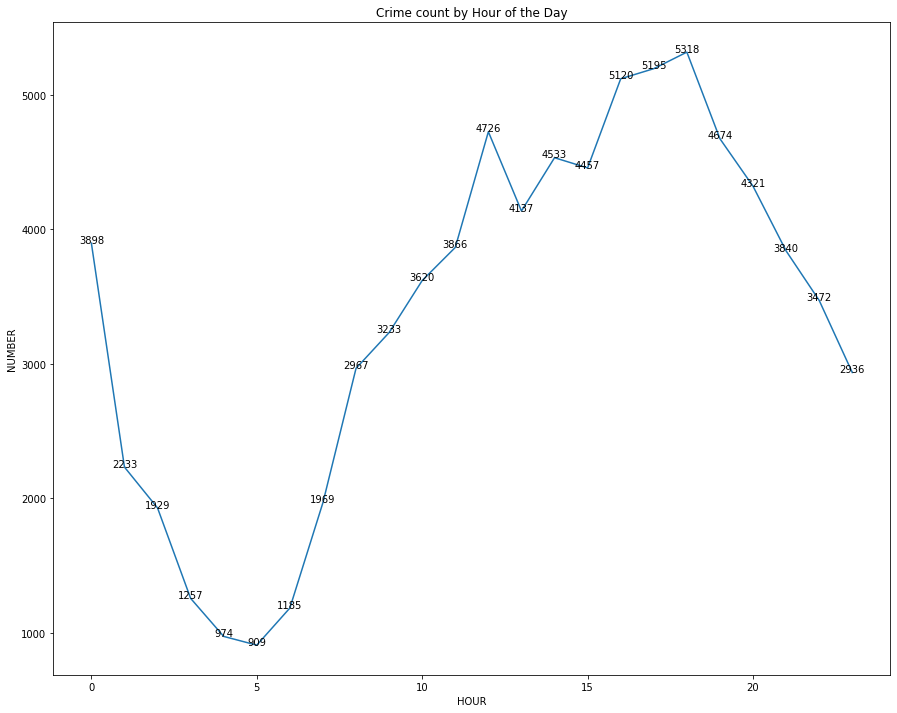

In [20]:
plt.figure(figsize = (15,12))
plt.title(r'Crime count by Hour of the Day')
p5 = sb.lineplot(x = h_num.index, y = 'NUMBER', data = h_num)
x = np.arange(h_num.index.shape[0])
y = np.array(list(h_num['NUMBER']))
for i, j in zip(x, y):
    plt.text(i, j, '%d'%j, ha='center')
else:
    pass
p5fig = p5.get_figure()
p5fig.savefig('./total_crimes_by_hour_bar.png')
plt.show()

## Insights

From the above line plot we can say that most crimes occur during midnight and during evening in between 4-6pm.

Analyzing the crimes according to the location.

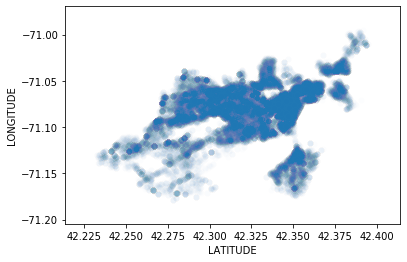

In [21]:
# Simple scatterplot
sb.scatterplot(x='LATITUDE',
               y='LONGITUDE',
                alpha=0.01,
               data=df1)

Analyzing and plotting crimes according to the district.

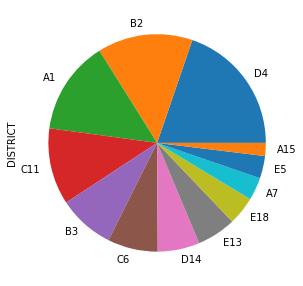

In [22]:
# PLOTING TOTAL NUMBER OF CRIMES IN EACH DISTRICT
plt.figure(figsize=(10,5))
df1['DISTRICT'].value_counts().plot.pie()
plt.show()

## Insights

From the above pie chart we can say that most crimes are reported D4, A1, B2 and C1 district. BPD should concentrate more on these areas.

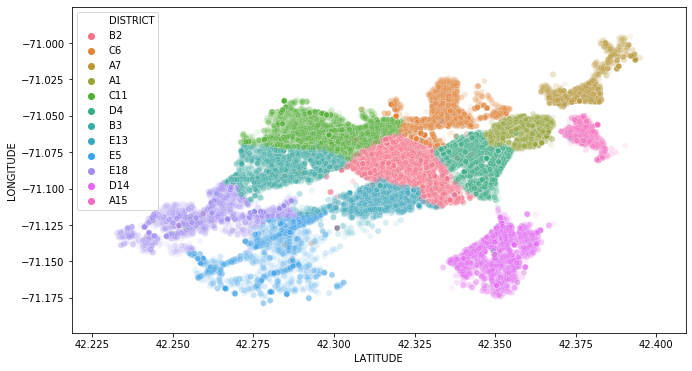

In [23]:
# Geographically plotting the crimes by district
pylab.rcParams["figure.figsize"] = 21,11

plt.subplots(figsize = (11,6))
sb.scatterplot(x = 'LATITUDE',
                y = 'LONGITUDE',
                hue = 'DISTRICT',
                alpha = 0.1,
                data = df1)

## Filtering and analyzing the crime data where Shooting was involved.

B2     616
B3     397
C11    287
E13    110
D4     107
C6      55
E18     55
A7      35
D14     29
E5      26
A1      21
A15      7
Name: DISTRICT, dtype: int64


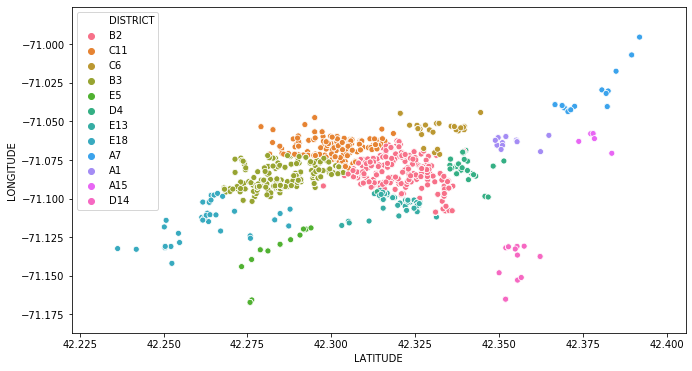

In [24]:
# plot Shooting by district (including all UCR)
df_shooting = df[df['SHOOTING'] == 'Y']
print(df_shooting['DISTRICT'].value_counts())

pylab.rcParams["figure.figsize"] = 21,11

plt.subplots(figsize = (11,6))
sb.scatterplot(x = 'LATITUDE',
                y = 'LONGITUDE',
                hue = 'DISTRICT',
                alpha = 1,
                data = df_shooting)

## Insights

Shooting crimes are very serious and it was reported highly in districts like B2, B3, C11, E13 and D4. BPD should be very cautious in these areas and gun laws should be made strict in these areas.

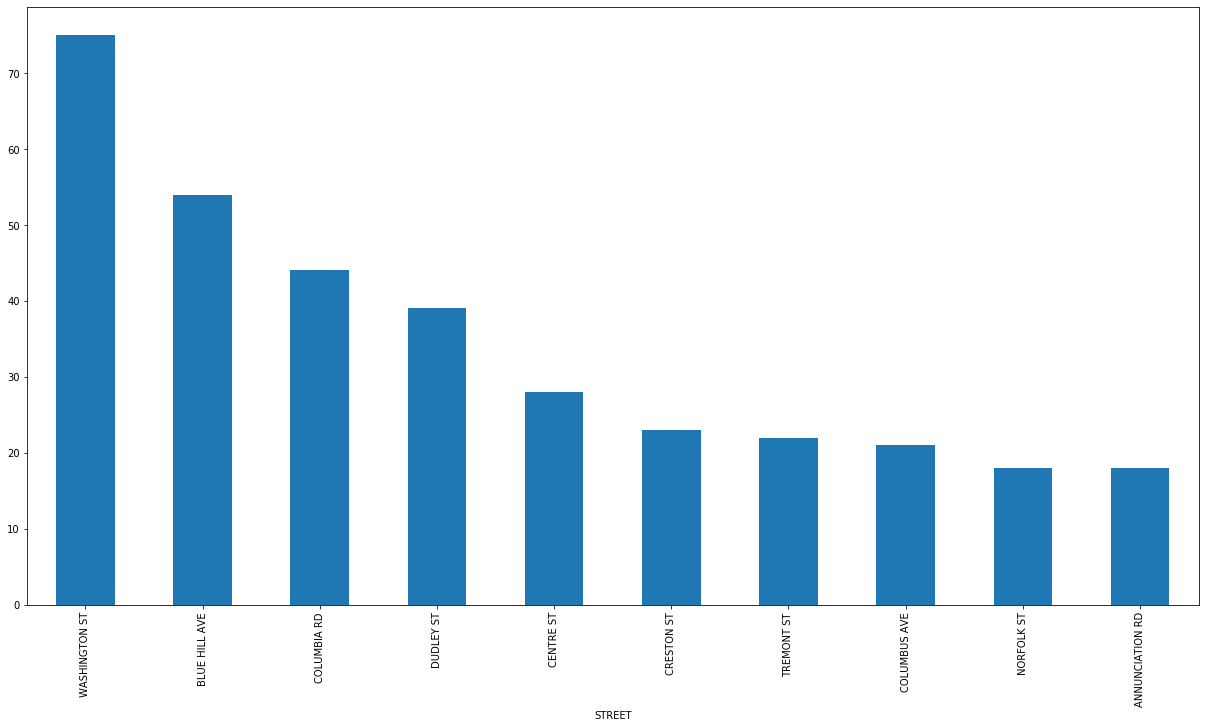

In [25]:
#Shooting as per streets
df_shooting.groupby('STREET').size().sort_values(ascending = False).head(10).plot(kind = 'bar')

## Insights

Washington ST has reported the most number of shooting crimes. BPD should be well prepared on the above shown streets as these are the top 10 streets with most shooting crimes.

# Predictive Analytics / Prediction Modelling

Using Principal Component Analysis (PCA) model to analyze the data

In [26]:
x = df.iloc[:,:]

x.loc[:, 'OFFENSE_CODE_GROUP'] = LabelEncoder().fit_transform(x.loc[:, 'OFFENSE_CODE_GROUP'])
x.loc[:, 'OFFENSE_DESCRIPTION'] = LabelEncoder().fit_transform(x.loc[:, 'OFFENSE_DESCRIPTION'])
x.loc[:, 'DISTRICT'] = LabelEncoder().fit_transform(x.loc[:, 'DISTRICT'].astype('str'))
x.loc[:, 'SHOOTING'] = LabelEncoder().fit_transform(x.loc[:, 'SHOOTING'].astype('str'))
x.loc[:, 'DAY_OF_WEEK'] = LabelEncoder().fit_transform(x.loc[:, 'DAY_OF_WEEK'])
x.loc[:, 'UCR_PART'] = LabelEncoder().fit_transform(x.loc[:, 'UCR_PART'].astype('str'))
x.loc[:, 'STREET'] = LabelEncoder().fit_transform(x.loc[:, 'STREET'].astype('str'))

In [27]:
x.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,LATITUDE,LONGITUDE,LOCATION
0,I192078648,3114,32,123,4,427,0,2019-09-29 06:39:00,2019,9,3,6,2,4761,42.277964,-71.092463,"(42.27796370, -71.09246318)"
1,I192078647,3115,31,122,0,,0,2019-09-29 03:45:00,2019,9,3,3,2,3157,42.367690,-71.065863,"(42.36769032, -71.06586347)"
2,I192078645,3301,64,231,4,450,0,2019-09-29 06:00:00,2019,9,3,6,2,276,42.291816,-71.072441,"(42.29181580, -71.07244098)"
3,I192078642,3820,43,164,8,269,0,2019-09-29 05:50:00,2019,9,3,5,2,111,42.332419,-71.075013,"(42.33241896, -71.07501315)"
4,I192078640,3115,31,122,2,28,0,2019-09-29 01:30:00,2019,9,3,1,2,3379,42.373392,-71.036478,"(42.37339168, -71.03647779)"


In [28]:
x.loc[:, 'REPORTING_AREA'] = LabelEncoder().fit_transform(x.loc[:, 'REPORTING_AREA'])

In [29]:
df2 = x.loc[:,['OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', \
                 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'YEAR','DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET']]
target = x.loc[:,'MONTH']

In [30]:
pca = PCA(n_components=11).fit(df2)

In [31]:
print(pca.explained_variance_ratio_)
'''
top2
OFFENSE_CODE
OFFENSE_CODE_GROUP
'''

[6.11308476e-01 3.70379139e-01 1.73044941e-02 9.41903979e-04
 5.13519775e-05 1.05116820e-05 2.47021079e-06 1.09525324e-06
 4.36047265e-07 1.21035358e-07 1.07028037e-09]


'\ntop2\nOFFENSE_CODE\nOFFENSE_CODE_GROUP\n'

OFFENCE_CODE and OFFENCE_CODE_GROUP are the main components in the PCA model.

Correlation Analysis Using Pearson Coefficient

In [32]:
pdata = x.loc[:,['OFFENSE_CODE', 'OFFENSE_CODE_GROUP', 'OFFENSE_DESCRIPTION', \
                 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'YEAR','DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'MONTH']]
PearsonMatrix = pd.DataFrame(round(pdata.corr(method = 'pearson'), 6))
PearsonMatrix.sort_values(by='OFFENSE_CODE_GROUP',ascending=False)

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,DAY_OF_WEEK,HOUR,UCR_PART,STREET,MONTH
OFFENSE_CODE_GROUP,0.257386,1.000000,0.562701,0.002554,0.011410,-0.082964,0.005907,-0.002006,-0.021362,0.193281,-0.005396,-0.004489
OFFENSE_DESCRIPTION,0.462897,0.562701,1.000000,0.009602,0.004735,-0.053225,0.014771,0.003300,-0.015389,0.069794,-0.004240,-0.009914
OFFENSE_CODE,1.000000,0.257386,0.462897,0.016423,0.014666,-0.063257,0.039739,-0.002166,-0.013008,0.218676,-0.002416,-0.015013
UCR_PART,0.218676,0.193281,0.069794,-0.022130,-0.004369,-0.048985,0.010304,0.005938,-0.006715,1.000000,0.012034,-0.021366
REPORTING_AREA,0.014666,0.011410,0.004735,0.193168,1.000000,0.002981,-0.006112,-0.004476,0.007587,-0.004369,-0.070040,0.000549
YEAR,0.039739,0.005907,0.014771,0.004551,-0.006112,-0.000636,1.000000,-0.000683,0.003755,0.010304,-0.014333,-0.275119
DISTRICT,0.016423,0.002554,0.009602,1.000000,0.193168,-0.010015,0.004551,0.003631,0.012488,-0.022130,-0.010681,-0.001049
DAY_OF_WEEK,-0.002166,-0.002006,0.003300,0.003631,-0.004476,-0.003414,-0.000683,1.000000,0.007509,0.005938,0.001794,-0.000213
MONTH,-0.015013,-0.004489,-0.009914,-0.001049,0.000549,0.008709,-0.275119,-0.000213,0.001258,-0.021366,-0.004861,1.000000
STREET,-0.002416,-0.005396,-0.004240,-0.010681,-0.070040,0.000892,-0.014333,0.001794,-0.003820,0.012034,1.000000,-0.004861


## Predicting OFFENCE_CODE_GROUP using PCA (Principal Component Analysis) & GBC (Gradient Boosting Classifier)

In [33]:
off_Sample = x.sample(n = 10000)
data = off_Sample.loc[:,['UCR_PART', 'YEAR', 'REPORTING_AREA']]
target = off_Sample.loc[:, 'OFFENSE_CODE_GROUP']

In [34]:
data.head()

,UCR_PART,YEAR,REPORTING_AREA
353335,3,2016,830
136446,2,2018,120
204680,3,2017,0
243852,2,2017,237
370752,1,2016,51


In [35]:
data['YEAR'] = LabelEncoder().fit_transform(data['YEAR'])

In [36]:
target.unique()

array([46, 52, 15, 64,  0, 40, 61, 35,  4, 34, 22, 31, 56, 32, 65, 63, 17,
       58, 51, 62, 27, 37, 66, 10, 43, 59, 49, 41, 11, 12, 21, 42, 18, 57,
        6, 44, 16, 19, 23, 45, 53, 14, 38, 33,  5, 24, 55, 47, 13, 48, 20,
       29,  3, 60, 36, 54,  2, 28, 26, 50,  1,  8], dtype=int64)

In [37]:
pdata=off_Sample.loc[:,['OFFENSE_CODE', 'OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION', \
                 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'YEAR','DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET','MONTH']]
ptarget=off_Sample.loc[:,'OFFENSE_CODE_GROUP']

In [38]:
pcamodel=PCA(n_components=12).fit(pdata)

In [39]:
pcamodel.explained_variance_ratio_

array([6.10277242e-01, 3.71381206e-01, 1.73279570e-02, 9.45658056e-04,
       5.06313638e-05, 1.03166276e-05, 2.92094316e-06, 2.43753360e-06,
       1.10450275e-06, 4.02907368e-07, 1.21711821e-07, 1.33376199e-09])

In [40]:
pcadata=PCA(n_components=2).fit_transform(pdata)

In [41]:
pcadata.shape

(10000, 2)

In [42]:
pcaDataTrain,pcaDataTest, \
pcaTargetTrain,pcaTargetTest = \
train_test_split(pcadata,ptarget,train_size=0.8)

In [43]:
pcaGBC = GBC(max_depth = 66).fit(pcaDataTrain, pcaTargetTrain)

In [44]:
pcaGBCpre = pcaGBC.predict(pcaDataTrain)
print(classification_report(pcaTargetTrain, pcaGBCpre))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       199
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00       114
           5       1.00      1.00      1.00        21
           6       1.00      1.00      1.00        25
           8       1.00      1.00      1.00         1
          10       1.00      1.00      1.00        28
          11       1.00      1.00      1.00        68
          12       1.00      1.00      1.00        39
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00        57
          15       1.00      1.00      1.00       431
          16       1.00      1.00      1.00        10
          17       1.00      1.00      1.00         6
          18       1.00      1.00      1.00         1
          19       1.00    

In [45]:
print(accuracy_score(pcaTargetTrain, pcaGBCpre))

1.0


In [46]:
warnings.filterwarnings('ignore')
pcaGBCpredict = pcaGBC.predict(pcaDataTest)
print(classification_report(pcaTargetTest, pcaGBCpredict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           2       0.00      0.00      0.00         3
           3       0.20      0.20      0.20         5
           4       0.94      1.00      0.97        32
           5       1.00      0.75      0.86         8
           6       0.43      0.38      0.40         8
          10       1.00      0.67      0.80         3
          11       0.69      0.39      0.50        23
          12       1.00      1.00      1.00         8
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00        17
          15       0.99      0.99      0.99       110
          16       1.00      1.00      1.00         2
          17       0.00      0.00      0.00         3
          19       0.57      0.57      0.57         7
          20       0.33      0.20      0.25         5
          21       0.82      0.75      0.78        12
          22       0.66    

In [47]:
print(accuracy_score(pcaTargetTest, pcaGBCpredict))

0.881


Using the PCA & GBC, predictiion of Offence Code Group can be done accurately.

## Conclusion

* 2016 was the year with most serious crimes i.e. crimes which comes under UCR Part 1.

* Crimes have considerably reduced from 2016 to 2018/19.

* August and September are the months where most crimes are reported. BPD should be prepared for these months.

* Friday is the day where most number of crimes are reported and Sunday is the day where least crimes are committed. BPS should be prepared and assign shfts accordingly.

* Most crimes are reoprted ate midnight and during 4-6 pm in a Day. BPD officials should be assign more shifts during these hours.

* B2, B3, C11, E13 and D4 are some of the police districts where most shotting crimes occur respectively and BPS should be trained and ready for dealing with armed criminals in these areas. Washington St, Blue Hill Ave and Columbia Rd are some of the streets with most shooting crimes.

* D4, A1, C11, B2 are some of the police districts where most crimes are reported. More BPD officials should be recruited and assigned in these areas.

